<a href="https://colab.research.google.com/github/malikbaqi12/Applied-data-science-using-pyspark-code-files/blob/main/3_supply_chain_data_analysis_99_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [ ]:
df = pd.read_csv('C:/Users/white/BDA Semester Project - 2023/dataset/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')


df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

deleting duplicate and not reated features

In [ ]:
data=df.copy()
FeatureList=['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Id', 'Customer Segment', 
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']

df1=df[FeatureList]
df1.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Data Visualization

# delvery status

In [ ]:
data_delivery_status=df1.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(x=data_delivery_status['Delivery Status'] , y=data_delivery_status['Number of Orders']  , color=data_delivery_status['Number of Orders'],
      labels = { 'Delivery Status': 'Delivery Status', 'Number of Orders': 'Number of Orders'})

In [ ]:
data_delivery_status_region=df1.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_delivery_status_region, x='Delivery Status', y='Number of Orders'  , color='Order Region',
      )

Central America and Western Europa have the most lated delivered Orders

# Top 20 Customers regarding the quanitity of orders

In [ ]:
df1['Customer_ID_STR']=df1['Customer Id'].astype(str)

data_customers=df1.groupby(['Customer_ID_STR'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_customers.head(20),x='Number of Orders', y='Customer_ID_STR' , color='Number of Orders'      )

C:\Users\white\AppData\Local\Temp\ipykernel_1816\1113062083.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Top 20 Customers regarding profit of all orders

In [ ]:
df1['Customer_ID_STR']=df1['Customer Id'].astype(str)

data_customers_profit=df1.groupby(['Customer_ID_STR'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)
px.bar(data_customers_profit.head(20),x='Profit of Orders', y='Customer_ID_STR' , color='Profit of Orders'      )

C:\Users\white\AppData\Local\Temp\ipykernel_1816\34035558.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Customer Segment

In [ ]:
#Customer Segments
data_Customer_Segment=df1.groupby(['Customer Segment'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.pie(data_Customer_Segment, values='Number of Orders', names= 'Customer Segment' , title= 'Number of Orders of different Customer Segments', 
       width=600 , height=600 , color_discrete_sequence = px.colors.sequential.RdBu)

# Category

In [ ]:
#Category Name
data_Category_Name=df1.groupby(['Category Name'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_Category_Name, x='Number of Orders',y = 'Category Name',color ='Number of Orders')



# Geo Features

In [ ]:
data_Region=df1.groupby(['Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_Region, x='Number of Orders',y = 'Order Region',color ='Number of Orders')



In [ ]:
data_countries=df1.groupby(['Order Country'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_countries.head(20), x='Number of Orders',y = 'Order Country',color ='Number of Orders')


In [ ]:

df_geo=df1.groupby([ 'Order Country', 'Order City'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)

df_geo

,Order Country,Order City,Profit of Orders
3260,República Dominicana,Santo Domingo,51111.670019
1492,Estados Unidos,New York City,47889.759868
2152,Honduras,Tegucigalpa,40973.640056
1430,Estados Unidos,Los Angeles,38014.360024
2837,Nicaragua,Managua,34319.950107
...,...,...,...
738,China,Dalian,-1588.609972
3,Afganistán,Kandahar,-1681.830001
3110,Reino Unido,Dudley,-1742.079996
2463,Italia,Cerignola,-2212.530012


In [ ]:
fig = px.choropleth(df_geo ,  locationmode='country names', locations='Order Country',
                    color='Profit of Orders', # lifeExp is a column of data
                    hover_name='Order Country', 
                    #hover_data ='Order City',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

# Sales Analysis

In [ ]:
#Order Country
df_sales_country=df1.groupby([ 'Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Order Country',color ='Sales of Orders')

In [ ]:
#Order Country
df_sales_country=df1.groupby([ 'Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Order Country',color ='Sales of Orders')


In [ ]:
#Product
df_sales_country=df1.groupby([ 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Product Name',color ='Sales of Orders')


In [ ]:
#Product and deliveray status
df_sales_pd=df1.groupby([ 'Product Name', 'Delivery Status'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pd.head(10), x='Sales of Orders',y = 'Product Name',color ='Delivery Status')


In [ ]:
#Product and order region
df_sales_pr=df1.groupby([ 'Product Name', 'Order Region'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Product Name',color ='Order Region')


In [ ]:
#'Category Name'
df_sales_pr=df1.groupby([  'Category Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Category Name',color ='Sales of Orders')


In [ ]:
#'Type of payment
df_sales_pr=df1.groupby([ 'Type'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Type',color ='Sales of Orders')


In [ ]:
df_sales_tp=df1.groupby([ 'Type', 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_tp.head(10), x='Sales of Orders',y = 'Type',color ='Product Name')


# Date and sales analysis

In [ ]:
import datetime as dt

data_orderdate=df[['order date (DateOrders)', 'Sales']]
data_orderdate['order_date'] = pd.to_datetime(data_orderdate['order date (DateOrders)'])

C:\Users\white\AppData\Local\Temp\ipykernel_1816\1806371535.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_orderdate["Quarter"] = data_orderdate['order_date'].dt.quarter
data_orderdate["Month"] = data_orderdate['order_date'].dt.month
data_orderdate["year"] = data_orderdate['order_date'].dt.year

C:\Users\white\AppData\Local\Temp\ipykernel_1816\3482627655.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\white\AppData\Local\Temp\ipykernel_1816\3482627655.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\white\AppData\Local\Temp\ipykernel_1816\3482627655.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
data_orderdate['YearStr']=data_orderdate['year'].astype(str)
df_sales_year=data_orderdate.groupby([ 'YearStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_year, x='Sales of Orders',y = 'YearStr',color ='Sales of Orders')


C:\Users\white\AppData\Local\Temp\ipykernel_1816\2785508228.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_orderdate['QuarterStr']=data_orderdate['Quarter'].astype(str)
df_sales_quarter=data_orderdate.groupby([ 'YearStr','QuarterStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_quarter, x='Sales of Orders',y = 'QuarterStr',color ='YearStr')

C:\Users\white\AppData\Local\Temp\ipykernel_1816\1609770672.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_orderdate['MonthStr']=data_orderdate['Month'].astype(str)
df_sales_m=data_orderdate.groupby([ 'QuarterStr', 'MonthStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_m, x='Sales of Orders',y = 'QuarterStr',color ='MonthStr')


C:\Users\white\AppData\Local\Temp\ipykernel_1816\3888878285.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Forecasting

Predicting if an order is fraud or not

In [ ]:
data=df1.copy()
data['SUSPECTED_FRAUD'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x


In [ ]:
features=data.drop(columns=['SUSPECTED_FRAUD','Order Status' ])
target=data['SUSPECTED_FRAUD']

In [ ]:
features.isnull().sum()

Type                               0
Benefit per order                  0
Sales per customer                 0
Delivery Status                    0
Late_delivery_risk                 0
Category Name                      0
Customer City                      0
Customer Country                   0
Customer Id                        0
Customer Segment                   0
Customer State                     0
Customer Zipcode                   3
Department Name                    0
Latitude                           0
Longitude                          0
Market                             0
Order City                         0
Order Country                      0
Order Customer Id                  0
order date (DateOrders)            0
Order Id                           0
Order Item Cardprod Id             0
Order Item Discount                0
Order Item Discount Rate           0
Order Item Id                      0
Order Item Product Price           0
Order Item Profit Ratio            0
O

we can consider NaN values as a separte class using LabelEncoder

In [ ]:
features=features.apply(Labelencoder_feature)
features.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer_ID_STR
0,1,18934,2568,0,0,40,66,1,20649,0,...,114,47,0,78,78,62,0,27149,3,11912
1,3,2272,2559,1,1,40,66,1,19386,0,...,114,47,0,78,78,62,0,2209,3,10509
2,0,2293,2555,3,0,40,452,0,19385,0,...,114,47,0,78,78,62,0,1980,3,10508
3,1,13638,2546,0,0,40,285,0,19384,2,...,114,47,0,78,78,62,0,1752,3,10507
4,2,20599,2526,0,0,40,66,1,19383,1,...,114,47,0,78,78,62,0,1528,3,10505


In [ ]:
#deleting features which high-correlated with other features to avoid multicollinarity
data1=pd.concat([features,target],axis=1)


In [ ]:
#deleting features which high-correlated with other features to avoid multicollinarity

corr = data1.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data1.columns[columns]
selected_columns

Index(['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
       'Market', 'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Quantity', 'Order Region', 'Order State', 'Order Zipcode',
       'Product Description', 'Product Image', 'Product Status',
       'Shipping Mode', 'Customer_ID_STR', 'SUSPECTED_FRAUD'],
      dtype='object')

In [ ]:
features1=features[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 
                    'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 
                    'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 
                    'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
                    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity',
                    'Order Region', 'Order State', 'Order Zipcode', 'Product Description', 'Product Image', 
                    'Product Status', 'Shipping Mode', 'Customer_ID_STR']]

In [ ]:
from scipy.stats import pearsonr

corre=pd.DataFrame()

for i in features1.columns:
    corre[i]= pearsonr(target, features1[i])
    
    
corre

C:\Users\white\anaconda3\envs\DS_env\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

C:\Users\white\anaconda3\envs\DS_env\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Item Product Price,Order Item Quantity,Order Region,Order State,Order Zipcode,Product Description,Product Image,Product Status,Shipping Mode,Customer_ID_STR
0,0.202094,-0.002586,-0.000807,0.128768,-0.167158,-0.002104,-0.003561,0.006756,0.009375,-0.005935,...,0.000315,-0.000757,0.009077,-0.006105,0.004666,NaN,-0.000741,NaN,-0.004641,0.000490
1,0.000000,0.271923,0.731807,0.000000,0.000000,0.371352,0.130283,0.004098,0.000068,0.011686,...,0.893383,0.747677,0.000115,0.009491,0.047437,NaN,0.752963,NaN,0.048639,0.835012


In [ ]:
corre1=corre.T

In [ ]:
coore2= corre1.iloc[:,0].sort_values(ascending=False)

coore2

Type                        0.202094
Delivery Status             0.128768
Customer Id                 0.009375
Order Region                0.009077
Customer Country            0.006756
Customer State              0.005670
Longitude                   0.005100
Order Zipcode               0.004666
order date (DateOrders)     0.003002
Order Item Discount         0.002893
Order Item Discount Rate    0.002271
Order Id                    0.002222
Customer_ID_STR             0.000490
Order Item Product Price    0.000315
Market                     -0.000293
Product Image              -0.000741
Order Item Quantity        -0.000757
Sales per customer         -0.000807
Department Name            -0.000837
Order Item Cardprod Id     -0.001109
Category Name              -0.002104
Benefit per order          -0.002586
Customer City              -0.003561
Shipping Mode              -0.004641
Latitude                   -0.004709
Order Country              -0.004928
Customer Zipcode           -0.005600
O

In [ ]:
coore2.index

Index(['Type', 'Delivery Status', 'Customer Id', 'Order Region',
       'Customer Country', 'Customer State', 'Longitude', 'Order Zipcode',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Id', 'Customer_ID_STR',
       'Order Item Product Price', 'Market', 'Product Image',
       'Order Item Quantity', 'Sales per customer', 'Department Name',
       'Order Item Cardprod Id', 'Category Name', 'Benefit per order',
       'Customer City', 'Shipping Mode', 'Latitude', 'Order Country',
       'Customer Zipcode', 'Order City', 'Customer Segment', 'Order State',
       'Late_delivery_risk', 'Product Description', 'Product Status'],
      dtype='object')

omit all features which have less than +-0.004 correlation with target

In [ ]:
new_features= ['Type', 'Delivery Status', 'Order Region', 'Customer Country', 'Customer State', 'Order Zipcode',
               'Shipping Mode', 'Order Country', 'Customer Zipcode', 'Order City', 'Customer Segment', 'Order State',
               'Late_delivery_risk', 'Product Description', 'Product Status']

In [ ]:
#Feature Selection

# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

In [ ]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [ ]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

,Variable,F_Value,P_Value
0,Type,7686.615869,0.000
18,Order Customer Id,15.868141,0.000
3,Delivery Status,3043.655705,0.000
4,Late_delivery_risk,5188.953532,0.000
31,Order Region,14.875551,0.000
8,Customer Id,15.868141,0.000
7,Customer Country,8.239934,0.004
32,Order State,6.728124,0.009
16,Order City,6.260967,0.012
9,Customer Segment,6.358072,0.012


In [ ]:
f_reg_list=f_reg_results.Variable.values
f_reg_list

array(['Type', 'Order Customer Id', 'Delivery Status',
       'Late_delivery_risk', 'Order Region', 'Customer Id',
       'Customer Country', 'Order State', 'Order City',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Longitude', 'Order Country', 'Latitude', 'Order Zipcode',
       'shipping date (DateOrders)', 'Shipping Mode'], dtype=object)

In [ ]:
#final features list is both f_ref_list and new_feature
final_features=features[['Type', 'Order Region', 'Delivery Status', 'Late_delivery_risk',
       'Customer Country', 'Order State', 'Order City',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Order Country', 'Order Zipcode', 'shipping date (DateOrders)',
       'Shipping Mode']]

In [ ]:
final_data=pd.concat([final_features, target], axis=1)

<AxesSubplot: >

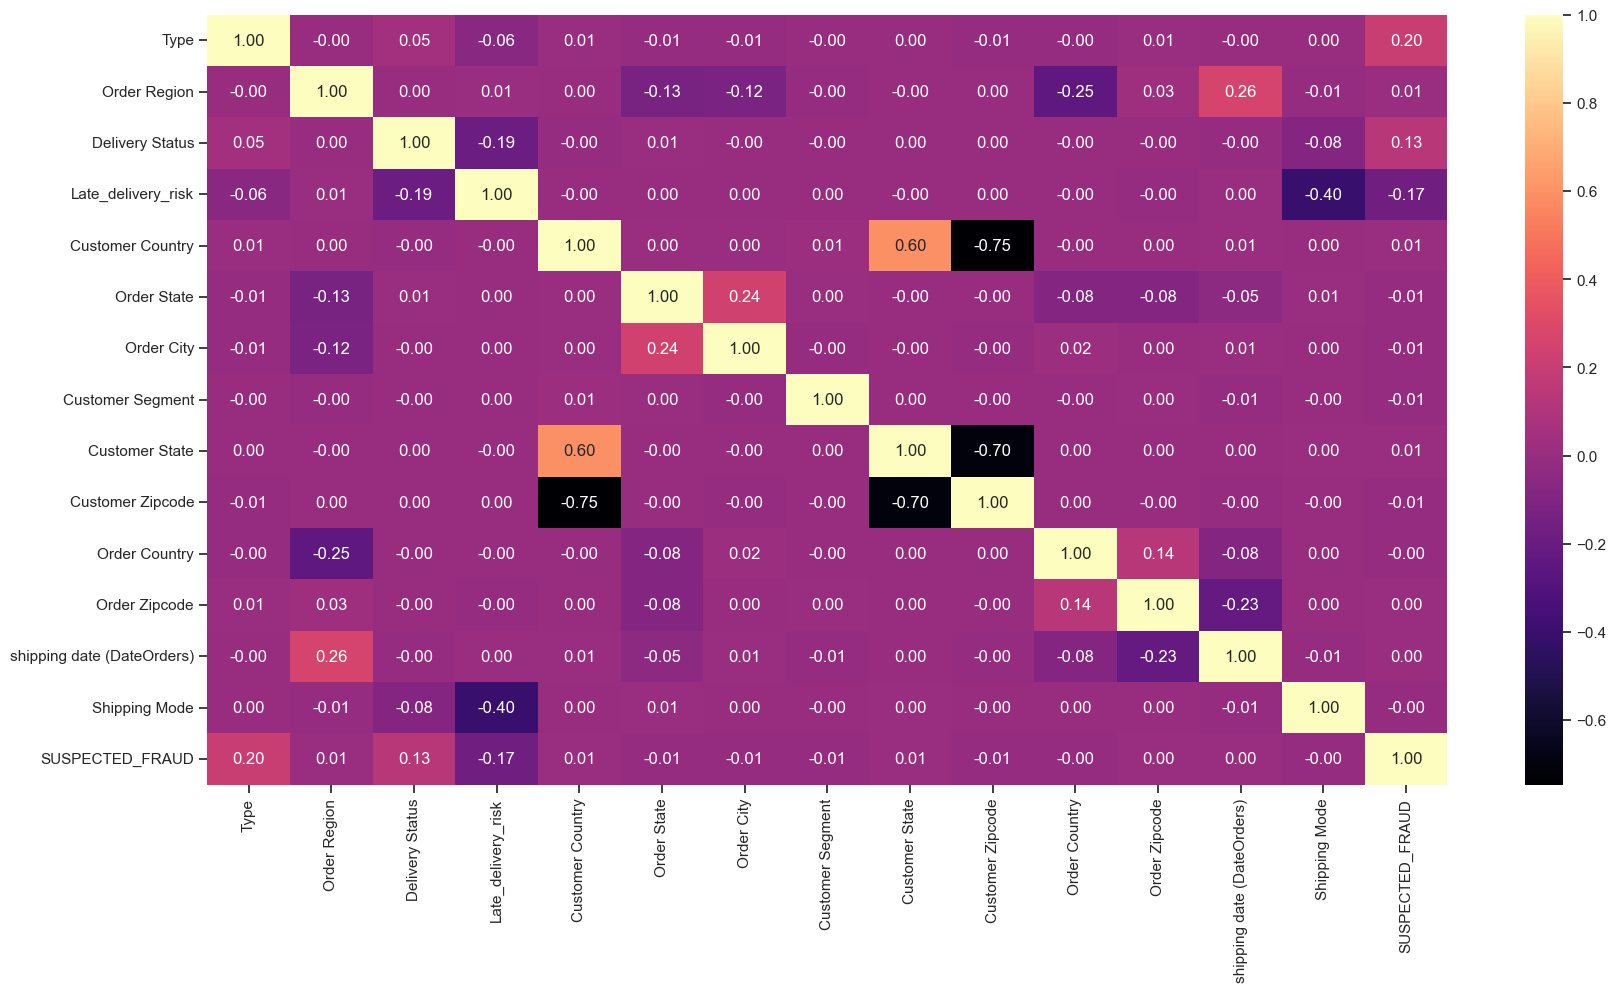

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

customer ZipCode and Customer state have high correlation with Customer Country. we can omit them and keep only customer country

In [ ]:
final_features2=final_features.drop(columns=['Customer State', 'Customer Zipcode'])

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size = 0.2, random_state = 42)

I use several classifiaction models using also CV to find the best model with best hyper parameter. 
pre-proccessing method is standard scaler


In [ ]:
lgr_pipline  = Pipeline([("scaler", StandardScaler()), ("LogisticRegression", LogisticRegression())])
rfc_pipline = Pipeline([("scaler", StandardScaler()), ("RandomForestClassifier", RandomForestClassifier())])
knn_pipline = Pipeline([("scaler", StandardScaler()), ("KNeighborsClassifier", KNeighborsClassifier())])
gnb_pipline = Pipeline([("scaler", StandardScaler()), ("GaussianNB", GaussianNB())])
sgd_pipline = Pipeline([("scaler", StandardScaler()), ("SGDClassifier", SGDClassifier())])
dt_pipline = Pipeline([("scaler", StandardScaler()), ("DecisionTreeClassifier", DecisionTreeClassifier())])


In [ ]:
pip_dict1 ={0:'Logistic Regression' , 1:'RandomForestClassifier' , 2: 'KNeighborsClassifier' ,
            3: 'GaussianNB', 4: 'SGDClassifier', 5: 'DecisionTreeClassifier' }

In [ ]:
piplines1=[lgr_pipline, rfc_pipline , knn_pipline, gnb_pipline  , sgd_pipline , dt_pipline ]

In [ ]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(piplines1):
    score = cross_val_score(pipe, final_features2, target, cv = 10)
    print(pip_dict1[i], ": ", score.mean())

Logistic Regression :  0.9764456985828234
RandomForestClassifier :  0.9914191719492657
KNeighborsClassifier :  0.9817637011135805
GaussianNB :  0.9795478562150082
SGDClassifier :  0.9774982135396149
DecisionTreeClassifier :  0.9930644269922715


In [ ]:
grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
    
    
    
]

In [ ]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", RandomForestClassifier())])

random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)


In [ ]:
best_model = random_search.fit(X_train, y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


In [ ]:
best_model.best_params_

In [ ]:
pipeline_rf = Pipeline([('scaler', StandardScaler()), 
                           ('Random Forest Calssifer', RandomForestClassifier(criterion='entropy', max_features='sqrt',
                        n_estimators=150))])

In [ ]:
model = pipeline_rf.fit(X_train, y_train)

In [ ]:
rf_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model.predict(X_train)})
rf_train_predict.head()

In [ ]:
rf_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model.predict(X_test)})
rf_test_predict.head()

In [ ]:
print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rf_train_predict.actual, rf_train_predict.predicted))
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rf_test_predict.actual, rf_test_predict.predicted))

In [ ]:
print('ROC-AUC Score for train dataset : ' , metrics.roc_auc_score(rf_train_predict.actual, rf_train_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rf_test_predict.actual, rf_test_predict.predicted))

In [ ]:
from sklearn import metrics
import seaborn as sns

conn_cm_test = metrics.confusion_matrix(rf_test_predict.actual, rf_test_predict.predicted)
sns.heatmap(conn_cm_test, fmt='.2f', annot=True)


In [ ]:
print(metrics.classification_report(rf_test_predict.actual, rf_test_predict.predicted))

Forecasting of an order has tardiness

In [ ]:
data=df[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 
             'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Zipcode', 
             'Department Name', 'Market', 'Order City', 'Order Country', 'Customer Id',
             'order date (DateOrders)', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate',
             'Order Item Id', 'Order Item Profit Ratio', 'Sales', 'Order Status',
             'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Zipcode', 
             'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price',
             'Product Status', 'shipping date (DateOrders)', 'Shipping Mode']]



In [ ]:
features=data.drop(columns=['Late_delivery_risk'])
target=data['Late_delivery_risk']

In [ ]:
features=features.apply(Labelencoder_feature)
features.head()


In [ ]:
#Feature Selection

# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

In [ ]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [ ]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

In [ ]:
f_reg_list=f_reg_results.Variable.values
f_reg_list

In [ ]:
df['Delivery Status'].value_counts()

'Delivery Status' should also be omited. it has directly related to the target

In [ ]:
final_features=features[['Type', 'Shipping Mode', 'Order Region',
       'Customer City', 'shipping date (DateOrders)']]

In [ ]:
final_data=pd.concat([final_features, target], axis=1)

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.2, random_state = 42)

In [ ]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(piplines1):
    score = cross_val_score(pipe, final_features, target, cv = 10)
    print(pip_dict1[i], ": ", score.mean())

In [ ]:
grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
    {"classifier": [KNeighborsClassifier()],
     "classifier__n_neighbors": [2,3,4,5,6],
     "classifier__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
     "classifier__leaf_size": [10,20,30,40,50],
    
    },
    
    {"classifier": [DecisionTreeClassifier()],
    "classifier__splitter" :["best", "random"],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
]

In [ ]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", RandomForestClassifier())])

random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)


In [ ]:
best_model = random_search.fit(X_train, y_train)

In [ ]:
best_model.best_params_

In [ ]:
pipeline_rfl = Pipeline([('scaler', StandardScaler()), 
                           ('andomForestClassifier', RandomForestClassifier(criterion='entropy'))])

In [ ]:
model_rfl = pipeline_rfl.fit(X_train, y_train)

In [ ]:
rfl_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model_rfl.predict(X_train)})
rfl_train_predict.head()

In [ ]:
rfl_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model_rfl.predict(X_test)})
rfl_test_predict.head()

In [ ]:
print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rfl_train_predict.actual, rfl_train_predict.predicted))
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rfl_test_predict.actual, rfl_test_predict.predicted))

In [ ]:
print('ROC-AUC Score for train dataset : ' , metrics.roc_auc_score(rfl_train_predict.actual, rfl_train_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rfl_test_predict.actual, rfl_test_predict.predicted))

In [ ]:
from sklearn import metrics
import seaborn as sns

conn_cm_test = metrics.confusion_matrix(rfl_test_predict.actual, rfl_test_predict.predicted)
sns.heatmap(conn_cm_test, fmt='.2f', annot=True)


In [ ]:
print(metrics.classification_report(rfl_test_predict.actual, rfl_test_predict.predicted))

# Forecasting Sales of different products

In [ ]:
data_sales=df[['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Id', 'Customer Segment', 
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']]

In [ ]:
features=data_sales.drop(columns=['Sales', 'Order Item Quantity', 'Order Item Product Price'])
target=data_sales['Sales']

In [ ]:
features=features.apply(Labelencoder_feature)
features.head()

In [ ]:
#Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

In [ ]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [ ]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

In [ ]:
f_reg_list=f_reg_results.Variable.values
f_reg_list

In [ ]:
final_features=features[['Order Id', 'Order Item Discount', 'Order Item Cardprod Id',
       'shipping date (DateOrders)', 'order date (DateOrders)',
       'Order Customer Id', 'Order Profit Per Order', 'Market',
       'Order Region', 'Order State', 'Order Item Total',
       'Department Name', 'Product Card Id', 'Customer Id',
       'Product Category Id', 'Product Image', 'Category Name',
       'Product Name', 'Product Price', 'Sales per customer',
       'Benefit per order', 'Order Zipcode', 'Order Item Id',
       'Order City', 'Customer Segment']]

In [ ]:
final_data=pd.concat([final_features, target], axis=1)

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, RANSACRegressor, Lasso, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.3, random_state = 42)

In [ ]:
lr_pipeline = Pipeline([("scaler", StandardScaler()), ("linear_regression", LinearRegression())])
ridge_pipeline = Pipeline([("scaler", StandardScaler()), ("ridge_regressor", Ridge(random_state = 42))])
lasso_pipeline = Pipeline([("scaler", StandardScaler()), ("lasso_regressor", Lasso(random_state = 42))])
random_forest_pipeline = Pipeline([("scaler", StandardScaler()), ("randomforest_regression", RandomForestRegressor(random_state = 42))])
xgboost_pipeline = Pipeline([("scaler", StandardScaler()), ("xgboost_regression", XGBRegressor())])
knn_pipeline = Pipeline([("scaler", StandardScaler()), ("knn_regression", KNeighborsRegressor())])

In [ ]:
pipelines = [lr_pipeline, ridge_pipeline, lasso_pipeline,
            random_forest_pipeline, xgboost_pipeline, knn_pipeline]

In [ ]:
pipe_dict = {0: "Linear Regression", 1: "Ridge",
            2: "Lasso", 3: "RandomForest", 4: "XGBoost",
            5: "Decision Tree", 6: "KNN"}

In [ ]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(pipelines):
    score = cross_val_score(pipe, final_features,target, cv = 5)
    print(pipe_dict[i], ": ", score.mean())

In [ ]:
grid_params = [
    
{"classifier": [XGBRegressor()],
     "classifier__n_estimators": [100,150,200,250,300],
     
}
    
]

In [ ]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", XGBRegressor())])
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)


In [ ]:
best_model = random_search.fit(X_train, y_train)

In [ ]:
best_model.best_params_

In [ ]:
pipeline_XGBRegressor = Pipeline([('scaler', StandardScaler()), ('XGBRegressor',  XGBRegressor(importance_type='gain', n_estimators=300, ))])

In [ ]:
model = pipeline_XGBRegressor.fit(X_train, y_train)

In [ ]:
XGB_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model.predict(X_train)})
XGB_train_predict.head()

In [ ]:
XGB_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model.predict(X_test)})
XGB_test_predict.head()

In [ ]:
predict = model.predict(X_test)

In [ ]:
r2_score(y_test, predict, multioutput='uniform_average')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=predict, mode='markers' ,  name='predicted vs actual'))
fig.add_trace(go.Scatter(x=y_test , y=y_test, mode='lines' , name='actual'))


fig.update_layout(title='actual Sales vs predicted Sales', xaxis_title= 'Actual Score', yaxis_title = 'Predicted Score' , template= 'plotly_dark')